# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.


## Instructions

- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q2.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Padala Sudheer Reddy
Roll Number: 2020101065

In [155]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [156]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [157]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}
image_dict = {
    0: 'Amitabhbachan',
    1: 'AamirKhan',
    2: 'DwayneJohnson',
    3: 'AishwaryaRai',
    4: 'BarackObama',
    5: 'NarendraModi',
    6: 'ManmohanSingh',
    7: 'VladimirPutin'
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [158]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [159]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)


Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


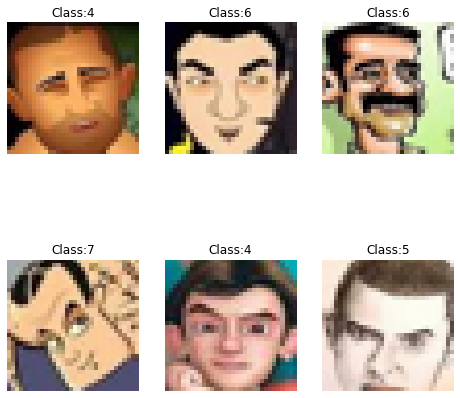

In [160]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X,y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


# Q1
* Individual eigenvector contain some feature information about the dataset of images. If we consider the dominant eigenvectors they retrieve more feature information. As the images has only some features they are visible to be ghost images 

# Q2

* The data is well distributed across the X-axis than the Y-axis. This indicates the variance is more across X-direction as they represents the features which are constructed by taking the most dominant eigenvector.

#### Write a function that gives eigen values and eigen vectors given data

In [161]:
# write function
def giveig(X):
    r = X.shape[1]*X.shape[2]*X.shape[3] # no of pixels for one image
    tot_images = X.shape[0] # total no of images
    data = np.zeros((tot_images,r))
    # eigenvalues = np.zeros(r)
    # eigenvectors = np.zeros((tot_images,r))
    for i in range(tot_images):
        data[i] = X[i].flatten()
    data = data - data.mean(axis=0)
    covar_mat = np.cov(data.T)
    w,v = np.linalg.eigh(covar_mat)
    indices = np.flip(np.argsort(w))
    eigenvalues = w[indices]
    eigenvectors = v[:,indices]
    return eigenvalues,eigenvectors,data

#### Compute eigen values and plot eigen value spectrum

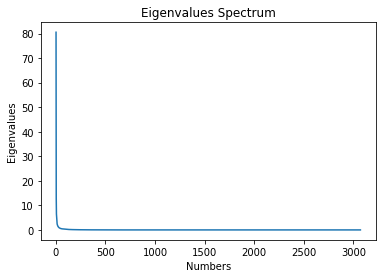

In [162]:
Z = np.zeros((X.shape[0],X.shape[1]*X.shape[2]*X.shape[3]))
for i in range(X.shape[0]):
        Z[i] = X[i].flatten()
eigenvalues,eigenvectors,data = giveig(X)
tot = len(eigenvalues)
num = np.arange(1,tot+1,1)
plt.plot(num,eigenvalues)
plt.xlabel('Numbers')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues Spectrum')
plt.show()

## Plot the percentage of variances vs the number of principal components

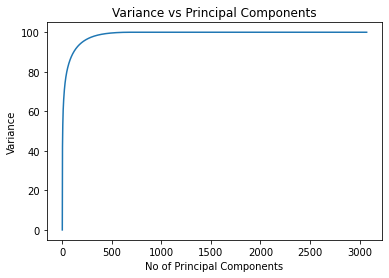

In [163]:
# plot variance vs components
var = np.zeros(tot)
totsum = np.sum(eigenvalues)
for i in range(tot):
    var[i] = np.sum(eigenvalues[:i])*100/totsum
plt.plot(num,var)
plt.xlabel('No of Principal Components')
plt.ylabel('Variance')
plt.title('Variance vs Principal Components')
plt.show()

#### Visualize eigen faces(eigen vectors)

In [164]:
"""
Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)
"""
def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [randrange(12)+1 for i in range(5)]

#### Reconstruction 

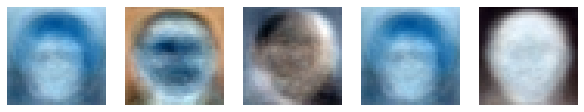

In [165]:
k = 100
neweigenvecs = eigenvectors[:,:k]
compressed_data = np.dot(data,neweigenvecs)
reconimgs = np.dot(compressed_data,neweigenvecs.T)
X=X.reshape(N,-1)
reconimgs = reconimgs + X.mean(axis=0)
plot(eigenvectors,H,W,C,indices)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


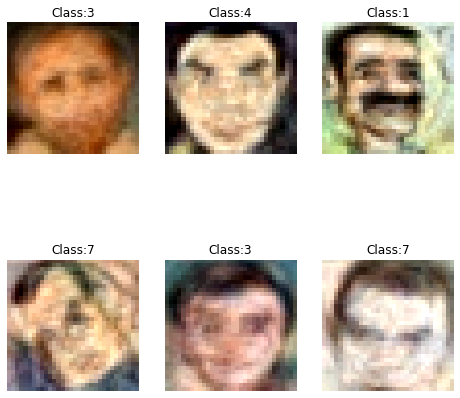

In [166]:
d = np.zeros((672, 32, 32, 3))
d=reconimgs.reshape(N,H,W,C)
ind = np.random.randint(0,y.shape[0],6)
display_images(d,y[ind], row=2,col=3)

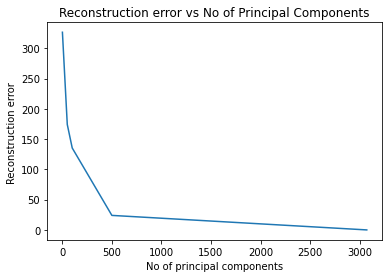

In [167]:
# Reconstruction error for 5 selected components
def getrecdata(k,eigenvectors,data,X):
    neweigenvecs = eigenvectors[:,:k]
    compressed_data = np.dot(data,neweigenvecs)
    reconimgs = np.dot(compressed_data,neweigenvecs.T)
    X=X.reshape(N,-1)
    reconimgs = reconimgs + X.mean(axis=0)
    return reconimgs
selcom = np.array([1,50,100,500,3072])
error = np.zeros(5)
for i in range(5):
    recon_data = getrecdata(selcom[i],eigenvectors,data,Z)
    error[i] = np.linalg.norm(Z-recon_data, 'fro')
plt.plot(selcom,error)
plt.xlabel('No of principal components')
plt.ylabel('Reconstruction error ')
plt.title('Reconstruction error vs No of Principal Components')
plt.show()


#### Plot data in 2D

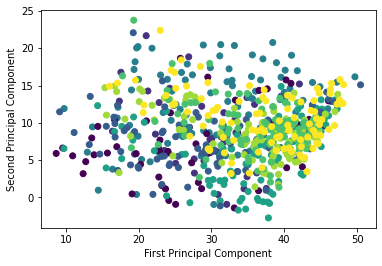

In [168]:
# plot data in 2D
data_twodim = np.zeros((672,2))
neweigenvecs = eigenvectors[:,:2]
compressed_data = np.dot(Z,neweigenvecs)
plt.scatter(*zip(*compressed_data),c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [169]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

In [170]:
# visualize
tot_classes = 8
r = X.shape[1]*X.shape[2]*X.shape[3]
unique, counts = np.unique(y, return_counts=True)
freqs = np.asarray((unique, counts)).T
incov_mat = np.zeros((tot_classes,r,r))
ineigval = np.zeros((tot_classes,r))
ineigvec = np.zeros((tot_classes,r,r,))
count=0
for i in range(len(freqs)):
    cindices = np.where(y==i)
    indata = Z[cindices]
    indata = indata - indata.mean(axis=0)
    incov_mat[i] = np.cov(indata.T)
    inw,inv = np.linalg.eigh(incov_mat[i])
    cl_indices = np.flip(np.argsort(inw))
    ineigval[i] = inw[cl_indices]
    ineigvec[i] = inv[:,cl_indices]
    print(i)
    


0
1
2
3
4
5
6
7


In [171]:
print(freqs)

[[  0  50]
 [  1  42]
 [  2  79]
 [  3 101]
 [  4 100]
 [  5 100]
 [  6 100]
 [  7 100]]


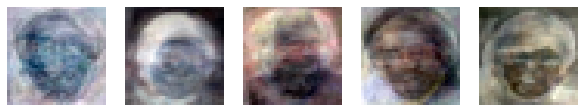

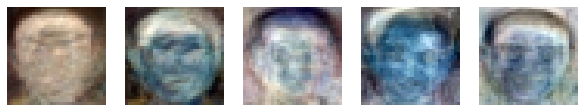

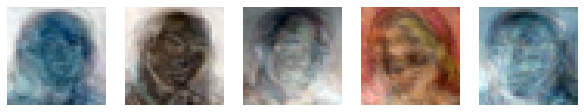

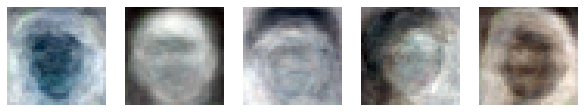

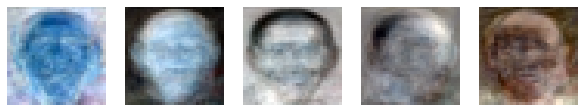

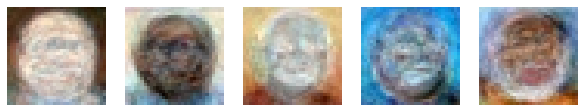

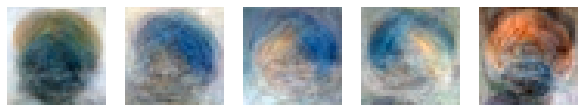

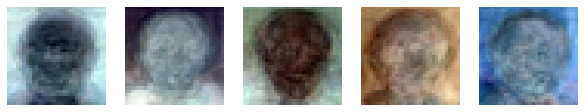

In [172]:
for i in range(tot_classes):  
    plot(ineigvec[i],H,W,C,[0,1,2,3,4])
count=0

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [173]:
# components required
print("Number of principal components required for 90% reconstruction of the:")
for i in range(tot_classes):
    totsum = np.sum(ineigval[i])
    for j in range(len(ineigval[i])):
        if ((np.sum(ineigval[i][:j])/totsum) > (0.9)):
            print(image_dict[i],"=",j)
            break;
totsum = np.sum(eigenvalues)
for j in range(len(eigenvalues)):
    if ((np.sum(eigenvalues[:j])/totsum) > (0.9)):
        print("Entire Dataset","=",j)
        break;


Number of principal components required for 90% reconstruction of the:
Amitabhbachan = 21
AamirKhan = 24
DwayneJohnson = 28
AishwaryaRai = 36
BarackObama = 43
NarendraModi = 57
ManmohanSingh = 50
VladimirPutin = 44
Entire Dataset = 115


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

# observation/analysis
* No,the number of components required to get 90% variance is not same for entire dataset and each of the classes. All the images belonging to a particular class have many features common in between them so the inter-class varaince is low. This implies that lesser number of principal components are sufficient to retrieve more information.  

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

* I observe that the regression score almost follows the same trend as that of varan iance. This increases on increasing the number of principal components. If k is less, the image data is more scattered than the original distribution, so the regression score is more. If k is more, the variance is more which implies that data tries to retreive the original distribution hence regression score is less.

In [174]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(X.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672, 3072)


In [ ]:
from sklearn import datasets, linear_model, metrics

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
Z = np.zeros((X.shape[0],X.shape[1]))
for i in range(X.shape[0]):
        Z[i] = X[i].flatten()
regression_score = np.zeros(200)
allks = np.arange(1,201,1)

for k in range(200): 
    allind = np.arange(0,len(Z),1)
    ind1 = np.random.randint(0,len(Z)-1,size=int(len(Z)*0.8))
    ind2 = np.setxor1d(allind, ind1)
    compdata = model.transform(Z)
    training_data = compdata[ind1]
    training_labels = label[ind1]
    testing_data = compdata[ind2]
    testing_labels = label[ind2]
    if k!=0:
        model=PCA(n_components=k)
        model.fit(Z)
    lrmodel = linear_model.LinearRegression() 
    lrmodel.fit(training_data, training_labels)
    print('Variance score: {}'.format(lrmodel.score(testing_data, testing_labels)))
    regression_score[k] = format(lrmodel.score(testing_data, testing_labels))
plt.plot(allks,regression_score)
plt.xlabel('No of principal components')
plt.ylabel('Regression score ')
plt.title('Regression score vs No of Principal Components')
plt.show()    

Variance score: 0.9368738106488751
Variance score: 0.9205947226907314
Variance score: 0.7225665541195316
Variance score: 0.7370067142297025
Variance score: 0.726381118369527
Variance score: 0.8101287420258215
Variance score: 0.7502270183356785
Variance score: 0.7969778307925242
Variance score: 0.8022091303910026
Variance score: 0.8373545389515014
Variance score: 0.8056448856853713
Variance score: 0.8187877729638166
Variance score: 0.8293673681039082
Variance score: 0.8235127811896028
Variance score: 0.8259269935818789
Variance score: 0.8098559866061065
Variance score: 0.8525190801113152
Variance score: 0.8535010809512805
Variance score: 0.8457246295161912
Variance score: 0.833012529245831
Variance score: 0.8034778221140628
Variance score: 0.8350338658017439
Variance score: 0.8230190761966287
Variance score: 0.8755624205174187
Variance score: 0.8495715280816609
Variance score: 0.8772416985250296
Variance score: 0.862387631677002
Variance score: 0.8808491639717315
Variance score: 0.87157

In [ ]:
# analysis / plot (split the cells if required)